In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle

In [2]:
# Black and White
# cSi = (0/255, 0/255, 0/255)          
# cC  = (255/255, 255/255, 255/255)    

# rSi = 1.0/3
# rC  = 1.0/3

# Colors Si, C
cSi = (0/255, 102/255, 255/255)   # Si Blue-lite
cC  = (179/255, 89/255, 0/255)    # C  Brown-lite

rSi = 1.18/3
rC  = 0.77/3

In [3]:
def latt(a,c):
    
    v1=np.array([a, 0])
    v2=np.array([0, c])
    
    return v1, v2

In [4]:
def CSiBond(R1,R2,r1,r2,c1,c2):
    
    line_coords = [R1, R2]
    x_coords, y_coords = zip(*line_coords)
    ax.plot(x_coords, y_coords, color='black', linewidth=1, zorder=1) 
    c1 = Circle(R1, r1, facecolor=c1, edgecolor='black', linewidth=1)
    c2 = Circle(R2, r2, facecolor=c2, edgecolor='black', linewidth=1)
    ax.add_patch(c1)
    ax.add_patch(c2)
    
    return 0

In [5]:
def end_plt(fname):
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', adjustable='box')

    plt.tight_layout()
    plt.savefig(fname)
    
    plt.show()
    
    return 0

In [6]:
def pos_xz(X,i,p,q,ashift):
    
    
    if X == 'A':
        x = 0 + ashift
        z = p/q + i
        
    elif X == 'B':
        x = 1/3 + ashift
        z = p/q + i
        
    elif X == 'C':
        x = 2/3 + ashift
        z = p/q + i
        
    return x, z

In [7]:
def PlotStack(Stacking,a,c,N,ashift):
    
    v1,v2=latt(a,c)
    
    M=len(Stacking)
    Layers=[]
    for i in range(len(Stacking)):
        Layers.append(Stacking[i])
    
    positions = []
    for i in range(N):
        d=3/(M*4)        
        for iLayer in range(M):
            x, z = pos_xz(Layers[iLayer],i,iLayer,M,ashift)
            position = x * v1 + z * v2
            positions.append(position)

    ASi = np.array(positions)
    AC = np.array([position + d * v2 for position in positions])
    
    for i in range(0,N):
        CSiBond(ASi[i],AC[i],rSi,rC,cSi,cC)
        #print(ASi[i])
        CSiBond(AC[i],ASi[i+1],rC,rSi,cC,cSi)
    
    for iLayer in range(M):
        ax.text(-0.5*a, ASi[iLayer][1], Layers[iLayer], fontsize=12, fontstyle='italic', ha='center', va='center')
    
    x1, y1 = 0, c  # Top-left corner
    x2, y2 = a, c  # Top-right corner
    x3, y3 = a, 0  # Bottom-right corner
    x4, y4 = 0, 0  # Bottom-left corner
    
    rectangle = Rectangle((x1, y1), x2 - x1, y3 - y1, edgecolor='lime', facecolor='none',alpha=0.5,linewidth=3)

    ax.add_patch(rectangle)
    
    ax.text(0.5*a, -1.5, Stacking, fontsize=12, fontstyle='italic', ha='center', va='center')
        
    return ASi, AC

In [8]:
def PlotLayer(a,c,Stacking):

    ashift=0
    PlotStack(Stacking,a,c,N,0)

    ashift=1 # Fix This Later
    PlotStack(Stacking,a,c,N,ashift)

    filename=Stacking+'.pdf'
    tmp=end_plt(filename)

In [9]:
N = 10    # No. of layers stacked along the c-vector
a = 3     # lattice constant a

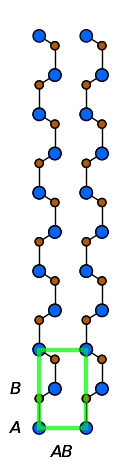

In [10]:
c = 5
Stacking='AB'
fig, ax = plt.subplots()
PlotLayer(a,c,Stacking)

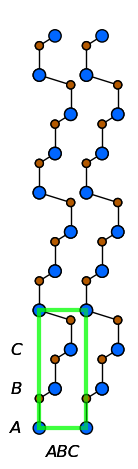

In [11]:
c = 7.5
Stacking='ABC'
fig, ax = plt.subplots()
PlotLayer(a,c,Stacking)

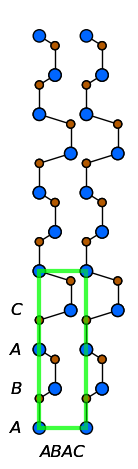

In [12]:
c = 10
Stacking='ABAC'
fig, ax = plt.subplots()
PlotLayer(a,c,Stacking)

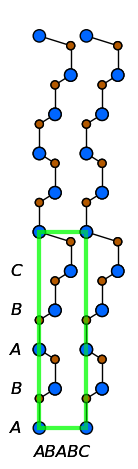

In [13]:
c = 12.5
Stacking='ABABC'
fig, ax = plt.subplots()
PlotLayer(a,c,Stacking)